# AI Community @ Семинар № 9
## Поиск лиц на изображении

План занятия:

* Немного теории: 
  * Про признаки: края, линии, диагонали и как их используют
  * Отбрасывание ненужных признаков: adaboost
  * Еще большее ускорение: каскады
* Практика:
  * Пример с человеком
  * Пример с несколькими людьми
  * Пример с кошкой

## Немного теории

### Признаки Хаара [2]
Каждый признак проходит окном по изображению.  
На каждом шаге считается сумма интенсивностей пикселей под белой частью и сумма интенсивностей пикселей под черной частью.  
Получается два значения - для белой части и для черной. Затем, из первого значения вычитается второе.

![](./images/haar_features.png)

### Пример

![](./images/feature_examples.png)

Этих признаков может быть очень много. Для окна размером 24 $\times$ 24 получается больше 160000 признаков.

---
Попробуем применить обученные каскады при помощи OpenCV.

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
face_cascade = cv2.CascadeClassifier('cascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('cascades/haarcascade_eye.xml')

In [3]:
human = cv2.imread('images/human.png')[:,:,::-1]
people = cv2.imread('images/people.jpg')[:,:,::-1]
cat = cv2.imread('images/cat.jpg')[:,:,::-1]

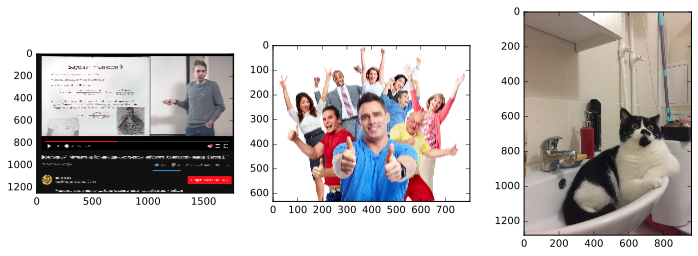

In [4]:
_, (left, center, right) = plt.subplots(ncols=3, figsize=(12, 4))
left.imshow(human)
center.imshow(people)
right.imshow(cat)
plt.show();

In [5]:
def plot_faces_eyes(image):
    img = image.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    return img

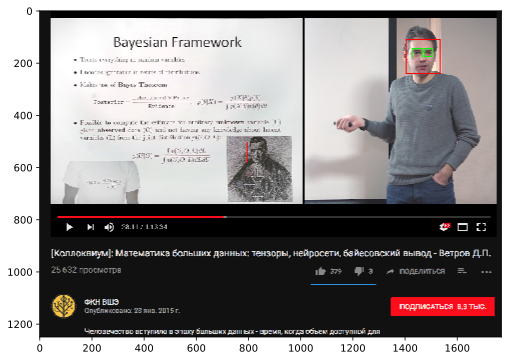

In [6]:
plt.figure(figsize=(17, 6))
plt.imshow(plot_faces_eyes(human));

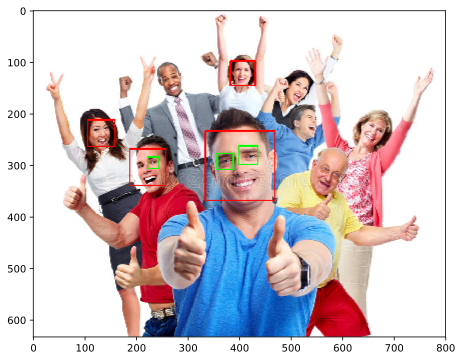

In [7]:
plt.figure(figsize=(17, 6))
plt.imshow(plot_faces_eyes(people));

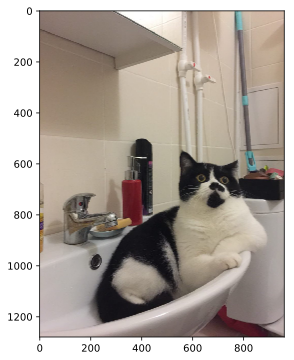

In [8]:
plt.figure(figsize=(17, 6))
plt.imshow(plot_faces_eyes(cat));

## Ссылки

1. [Integral image](https://en.wikipedia.org/wiki/Summed-area_table)
2. [Haar wavelets](https://en.wikipedia.org/wiki/Haar_wavelet)